# 16. CNN 익히기

## 1. 데이터 전처리

In [6]:
import sys

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf

In [2]:
seed=0
np.random.seed(seed)
tf.random.set_seed(3)
# MNIST 데이터셋 불러오기
(X_train,Y_class_train),(X_test,Y_class_test) = mnist.\
load_data()

print('학습셋 이미지 수: %d 개'%(X_train.shape[0]))
print('테스트셋 이미지 수: %d 개'%(X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


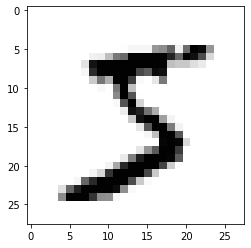

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [7]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [10]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0],784)
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0],784).astype('float64') / 255

In [11]:
# 클래스 값 확인
print('class : %d' %(Y_class_train[0]))
# 바이너리화 과정
Y_train = to_categorical(Y_class_train,10)
Y_test = to_categorical(Y_class_test,10)
print(Y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 기본 프레임 만들기

In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],784).astype('float32') / 255
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

In [15]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',  # 범주형 교차 엔트로피
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                              verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)


Epoch 00001: val_loss improved from inf to 0.14919, saving model to ./model\01-0.1492.hdf5

Epoch 00002: val_loss improved from 0.14919 to 0.10327, saving model to ./model\02-0.1033.hdf5

Epoch 00003: val_loss improved from 0.10327 to 0.09091, saving model to ./model\03-0.0909.hdf5

Epoch 00004: val_loss improved from 0.09091 to 0.07599, saving model to ./model\04-0.0760.hdf5

Epoch 00005: val_loss improved from 0.07599 to 0.07478, saving model to ./model\05-0.0748.hdf5

Epoch 00006: val_loss improved from 0.07478 to 0.06871, saving model to ./model\06-0.0687.hdf5

Epoch 00007: val_loss improved from 0.06871 to 0.06682, saving model to ./model\07-0.0668.hdf5

Epoch 00008: val_loss improved from 0.06682 to 0.06434, saving model to ./model\08-0.0643.hdf5

Epoch 00009: val_loss improved from 0.06434 to 0.06324, saving model to ./model\09-0.0632.hdf5

Epoch 00010: val_loss did not improve from 0.06324

Epoch 00011: val_loss did not improve from 0.06324

Epoch 00012: val_loss did not impro

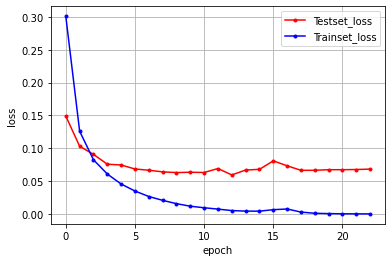

In [17]:
# 모델의 실행
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,
                   batch_size=200,verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test,Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [20]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [26]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                              verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [30]:
# 모델의 실행
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,
                   batch_size=200,verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test,Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.04143, saving model to ./model\01-0.0414.hdf5

Epoch 00002: val_loss improved from 0.04143 to 0.03528, saving model to ./model\02-0.0353.hdf5

Epoch 00003: val_loss improved from 0.03528 to 0.03441, saving model to ./model\03-0.0344.hdf5

Epoch 00004: val_loss improved from 0.03441 to 0.02840, saving model to ./model\04-0.0284.hdf5

Epoch 00005: val_loss did not improve from 0.02840

Epoch 00006: val_loss did not improve from 0.02840

Epoch 00007: val_loss did not improve from 0.02840

Epoch 00008: val_loss did not improve from 0.02840

Epoch 00009: val_loss did not improve from 0.02840

Epoch 00010: val_loss did not improve from 0.02840

Epoch 00011: val_loss did not improve from 0.02840

Epoch 00012: val_loss did not improve from 0.02840

Epoch 00013: val_loss did not improve from 0.02840

Epoch 00014: val_loss did not improve from 0.02840
313/313 [==============================] - 6s 17ms/step - loss: 0.0300 - accuracy: 0.9917 2s -

 Tes

In [31]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

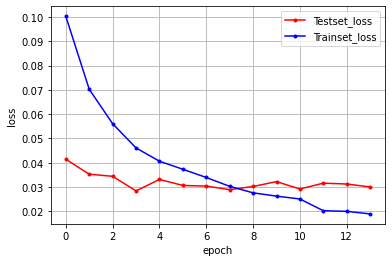

In [32]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

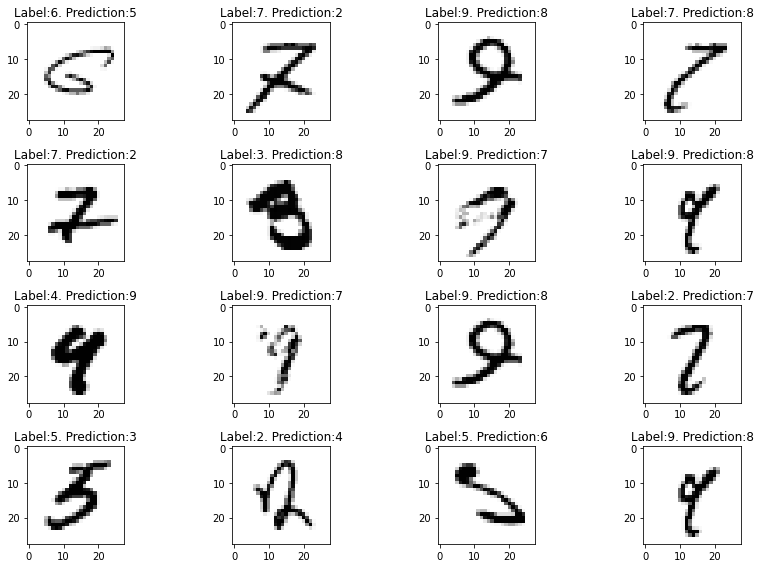

In [36]:
import random
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,axis=1)
test_labels = np.argmax(Y_test,axis=1)
wrong_result = []

for n in range(0,len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
samples = random.choices(population=wrong_result,k=16)

count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
    tmp = 'Label:'+str(test_labels[n])+'. Prediction:'+ str(predicted_labels[n])
    plt.title(tmp)
    
plt.tight_layout()
plt.show()